For this model we will use the car evaluation dataset from UC Irvine's website: http://archive.ics.uci.edu/dataset/19/car+evaluation

We will first import the files and check the type of files

In [4]:
#pip install ucimlrepo I will not execute this line since it has already been executed previously.

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
#print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

The description of the file tells us that all the data in the set is of the categorical type and there are no null values 

In [6]:
#pip install category_encoders #I will not be running this line as I have already executed it previously.

## Importing all the libraries needed. 

In [24]:
import pandas as pd #dataframe library
import matplotlib.pyplot as plt #to plot the decision tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree classfier algorithm
from sklearn.model_selection import train_test_split #since we must test the model we're building we will split the dataset
import category_encoders as ce #so we can give numeric values to categorical values to feed to the algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #criteria to check the model performance
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #random forest algorithm and feature contribution 


In [8]:
#Checking the nature of the target file
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


In [9]:
#checking the nature of the variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [10]:
X.head() #printing the first 5 entries of the X file

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [11]:
#Checking the number of entries each category has in the class file
for col in y:
    print(y[col].value_counts())


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


## Splitting the Dataset

Before we perform any modeling, we will split the dataset into training and testing sets, we will make the test size 30% of the whole dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Before we conduct the decision tree classfication, we have to first convert the ordinal data that we have into numerical data since the decision tree classifier cannot accept string data. To do this we use sklearn's ordinal encoder 

## Encoding the Dataset 

In [14]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## 1. Decision Tree with default (gini) criteria

In [19]:
#First we create a decision tree classifier object:
car_eval = DecisionTreeClassifier()

# Train Decision Tree Classifer
car_eval = car_eval.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = car_eval.predict(X_test)

In [22]:
print("Accuracy of the model:",accuracy_score(y_test, y_pred))

Accuracy of the model: 0.8940269749518305


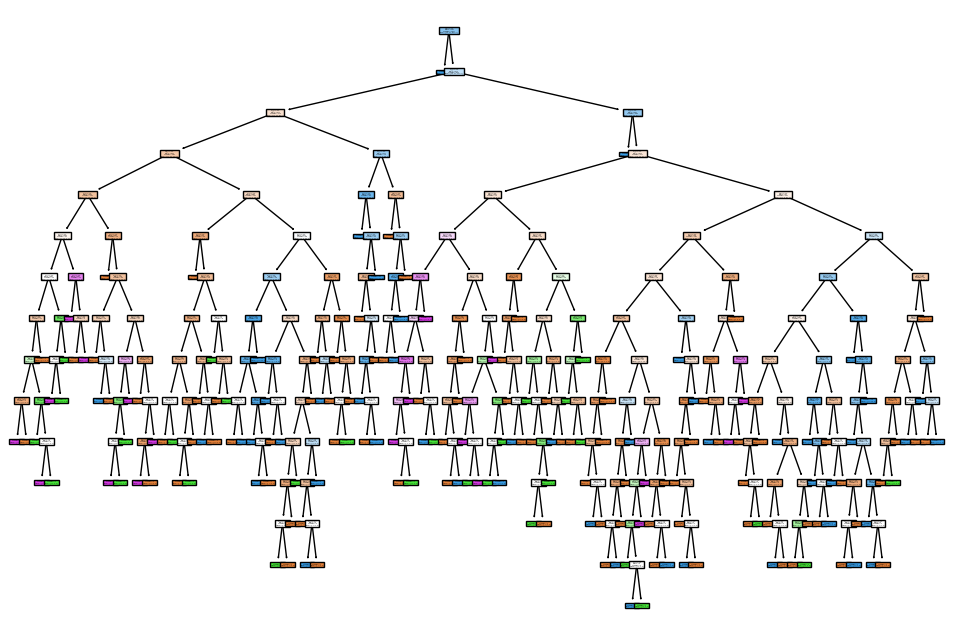

In [25]:
#plotting the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(car_eval,
               filled=True)
plt.show()

## 2. Decision Tree Classifier with Information Gain (entropy) criteria :

In [29]:
#First we create a decision tree classifier object:
car_ig = DecisionTreeClassifier(criterion="entropy")

#We train the model:
car_ent = car_ig.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = car_ent.predict(X_test)

In [30]:
print("Information Gain Accuracy:",accuracy_score(y_test, y_pred1))

Information Gain Accuracy: 0.8786127167630058


The accuracy of this model has dropped. 

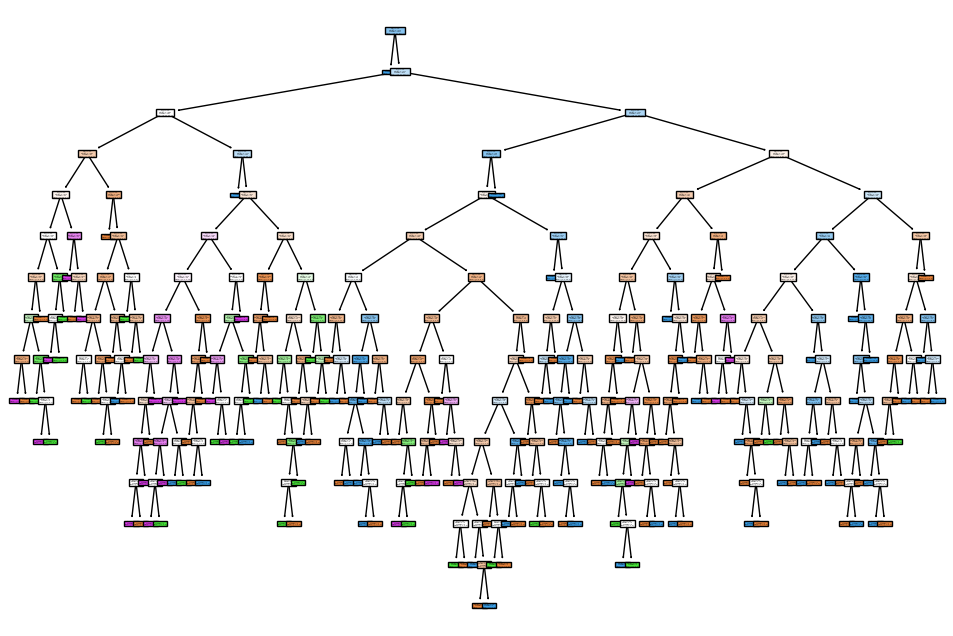

In [28]:
plt.figure(figsize=(12,8))
tree.plot_tree(car_ent,
               filled=True)
plt.show()

In [32]:
print('Confusion matrix report of the decision tree:')
print(confusion_matrix(y_test, y_pred))

print('Confusion matrix report of decision tree based on information gain index')
print(confusion_matrix(y_test, y_pred1))

Confusion matrix report of the decision tree:
[[ 86   5  15   5]
 [  8  10   3   1]
 [ 10   0 358   0]
 [  2   6   0  10]]
Confusion matrix report of decision tree based on information gain index
[[ 82   6  18   5]
 [  8  10   3   1]
 [ 14   0 354   0]
 [  2   6   0  10]]


## Random Forest Classifier: 
Random forest is a classifier which uses multiple decision trees to get an even more accurate model. Each tree has a vote which contributes to the accuracy of the model. In this next portion, we will first model a random forest with 10 trees, 100 trees, drop irrelevant variables and then model a random forest with remaining variables to see if there is any change in accuracy. 

Usually, the random forest has a better performance.

## 1. Random forest with 10 trees: 

In [41]:
#Declaring the object for the algorithm
car_rf = RandomForestClassifier(n_estimators= 10, random_state = 0)

#training the model
car_rf.fit(X_train, y_train)

#testing the model
pred_rf = car_rf.predict(X_test)

C:\Users\safam\AppData\Local\Temp\ipykernel_27124\1614832960.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  car_rf.fit(X_train, y_train)


In [34]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, pred_rf))

Random Forest Accuracy: 0.8535645472061657


## 2. Random Forest with 100 Trees:

In [42]:
#Declaring the object for the algorithm
car_rf100 = RandomForestClassifier(n_estimators=100,random_state = 0)

#training the model
car_rf100.fit(X_train, y_train)

#testing the model
pred_rf100 = car_rf100.predict(X_test)

C:\Users\safam\AppData\Local\Temp\ipykernel_27124\3973503512.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  car_rf100.fit(X_train, y_train)


In [36]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, pred_rf100))

Random Forest Accuracy: 0.8747591522157996


## 3a. Checking for Irrelevant variables and dropping them

In [44]:
#Declaring the object for the algorithm
check = ExtraTreesClassifier()

#training the model
check.fit(X_train, y_train)

#checking the feature importances and then printing them in ascending order of importance 
feature_imp = pd.Series(check.feature_importances_, index=X_train.columns).sort_values()
print(feature_imp)

doors       0.067197
lug_boot    0.084054
maint       0.179607
buying      0.185827
persons     0.219893
safety      0.263422
dtype: float64


C:\Users\safam\AppData\Local\Temp\ipykernel_27124\2444374391.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  check.fit(X_train, y_train)


Both doors and lug_boot variables have a contribution of less than 10%, so we will drop both one after the other to check if there are any improvements in our model:

## 3b. Creating decision Trees with only relevant variables:

- I will drop doors from X_train and X_test and see if there is a change in accuracy 

In [63]:
X_train_new = X_train.drop(['doors'],axis=1)
X_test_new = X_test.drop(['doors'],axis=1)

In [64]:
#Training the model with the new variables
car_rf100.fit(X_train_new, y_train)

#testing the model
ypred_1 = car_rf100.predict(X_test_new)

C:\Users\safam\AppData\Local\Temp\ipykernel_27124\3131930191.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  car_rf100.fit(X_train_new, y_train)


In [65]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, ypred_rf100))

Random Forest Accuracy: 0.9364161849710982


As we can see, there is a significant jump in the accuracy from 87% to 93%, this means that our model performs better when doors is not considered as an important feature.

- I will now drop lug_boot from both X_train and X_test and check if there is a change in the accuracy 

In [56]:
X_train_new2 = X_train_new.drop(['lug_boot'],axis=1)
X_test_new2 = X_test_new.drop(['lug_boot'],axis=1)

In [67]:
#Training the model
car = car_rf100.fit(X_train_new2, y_train)

#Testing the model
ypred_2 = car.predict(X_test_new2)

C:\Users\safam\AppData\Local\Temp\ipykernel_27124\4022141755.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  car = car_rf100.fit(X_train_new2, y_train)


In [68]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, ypred_2))

Random Forest Accuracy: 0.8670520231213873


Since there was a significant drop in the accuracy after dropping lug_boot, we will consider it an important feature and retain it in the model.

## Performance of the Best Performing Model:

The random forest with 100 trees and without the door variable is the best model to predict the class of the car in terms of its accuracy. However, when considering the model, we should look at other identifiers like the confusion matrix to see where the model is going wrong, as well as the classfication report which gives us the f1 test scors as well:

1. Confusion matrix tells us about the True positives, True Negatives, False Positives, and False Negatives, that the model incurred:
2. Classfication report gives us an in-depth analysis of each of the class variables. 

In [61]:
print("Confusion matrix results:\n", confusion_matrix(y_test, ypred_1))
print('\n Classfication report:\n' ,classification_report(y_test, ypred_1))

Confusion matrix results:
 [[ 98   2   9   2]
 [  2  17   2   1]
 [ 11   0 357   0]
 [  1   3   0  14]]

 Classfication report:
               precision    recall  f1-score   support

         acc       0.88      0.88      0.88       111
        good       0.77      0.77      0.77        22
       unacc       0.97      0.97      0.97       368
       vgood       0.82      0.78      0.80        18

    accuracy                           0.94       519
   macro avg       0.86      0.85      0.86       519
weighted avg       0.94      0.94      0.94       519



3. We also check the training and testing set scores for our best performing model:

In [66]:
print('Training set score: {:.4f}'.format(car_rf100.score(X_train_new, y_train)))

print('Test set score: {:.4f}'.format(car_rf100.score(X_test_new, ypred_1)))

Training set score: 0.9694
Test set score: 1.0000


Since scores are comparable we can say that there is minimal overfitting. 

## Inferences and Conclusions 

1. Random forests are generally better performing than a single decision tree model
2. When possible we should check if there are variables that are irrelevant and should be dropped if it helps our model perform better
3. It is important to check for overfitting since decision trees are highle perceptible to noise
4. Check for more than one paramenters of performance
5. With an almost 94% accuracy, the random forest is a satisfactory model. 
6. A classfication report is better suited for a multiclass classification it gives us a better understanding of the model performance in terms of the macro avg f1 score, weighted avg f1 score, as well as recall and precision (which use true negative and true positive values) of each class.
